# Student Sample 1

## 古貿昌

## Assignment V: Text Vectorization

## Question 1

Use `nltk.corpus.inaugural` as the corpus data for this exercise. It is a collection of US presidential inaugural speeches over the years. Cluster all the inaugural speeches collected in the corpus based on their bag-of-words vectorized representations.

Please consider the following settings for bag-of-words model:
- Use the English stopwords provided in `nltk.corpus.stopwords.words('english')` to remove uninformative words.
- Lemmatize word tokens using `WordNetLemmatizer()`.
- Normalize the letter casing.
- Include in the Bag-of-words model only words consisting as alphabets or hyphens.
- Use `TfIdfVectorizer()` for bag-of-word vectorization.

In [ ]:
# Google colab setting

# !pip install ckip-transformers

# from google.colab import drive
# drive.mount('/content/drive')

# import os
# os.chdir('/content/drive/MyDrive/ENC2045')

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import inaugural
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import ckip_transformers
from ckip_transformers.nlp import CkipWordSegmenter, CkipPosTagger
import unicodedata

## Default Style Settings
matplotlib.rcParams['figure.dpi'] = 150
pd.options.display.max_colwidth = 200
#%matplotlib inline

# nltk.download('inaugural')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('stopwords')
# nltk.download('wordnet')

In [ ]:
corpus = [inaugural.raw(text) for text in inaugural.fileids()]

print(len(corpus))
corpus[0][:100]

58


'Fellow-Citizens of the Senate and of the House of Representatives:\n\nAmong the vicissitudes incident '

In [ ]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('R'):
        return wordnet.ADV
    return wordnet.NOUN

In [ ]:
wnl = WordNetLemmatizer()
stop_words = nltk.corpus.stopwords.words('english')

def normalize_doc(doc):
    # lower case and remove special characters/whitespaces
    doc = re.sub(r'[^a-zA-Z\s-]', '', doc, re.I | re.A)
    doc = doc.lower()
    doc = doc.strip()

    # get pos tag for lemmtization
    text_word = nltk.word_tokenize(doc)
    text_pos = nltk.pos_tag(text_word)

    # tokenize document
    tokens = [wnl.lemmatize(pair[0], pos=get_wordnet_pos(pair[1])) for pair in text_pos]
                            
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_doc)

In [ ]:
norm_corpus = normalize_corpus(corpus)

In [ ]:
print(corpus[0][:100])
print("="*50)
print(norm_corpus[0][:100])

Fellow-Citizens of the Senate and of the House of Representatives:

Among the vicissitudes incident 
fellow-citizens senate house representative among vicissitude incident life event could fill great a


In [ ]:
tv = TfidfVectorizer(min_df=0., max_df=1., 
                     norm='l2',
                     use_idf=True,
                     smooth_idf=True)

inaugural_matrix = tv.fit_transform(norm_corpus).toarray()

vocab = tv.get_feature_names()
textsid = [re.sub(r'\.txt', '', text) for text in inaugural.fileids()]

inaugural_tfidf_df = pd.DataFrame(np.round(inaugural_matrix, 2), columns=vocab, index=textsid)

inaugural_tfidf_df

,000,15th,1801,1817,1850,1886,1890,1893,1897,1917,67,abandon,abandonment,abate,abdicated,abeyance,abhor,abide,abiding,ability,abject,able,ably,abnormal,abode,abolish,aboriginal,aborigine,abound,abraham,abreast,abridge,abroad,absence,absent,absolute,absolutely,absolutism,absorb,abstain,...,worthily,worthless,worthy,would,wound,wreck,wreckage,wrest,wretchedness,wright,wring,writ,write,writer,writing,wrong,wrongdoing,wrongfully,wrought,xand,xtested,xthey,xwe,year,yearn,yes,yesterday,yet,yield,yielded,york,yorktown,young,yourselfxand,youth,youthful,zeal,zealous,zealously,zone
1789-Washington,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1793-Washington,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1797-Adams,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00
1801-Jefferson,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.03,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00
1805-Jefferson,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.09,0.00,0.00,0.00
1809-Madison,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00
1813-Madison,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1817-Monroe,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.02,0.02,0.00,0.03
1821-Monroe,0.05,0.00,0.02,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.03,0.00,0

In [ ]:
inaugural_similarity_matrix = cosine_similarity(inaugural_matrix)
inaugural_similarity_df = pd.DataFrame(inaugural_similarity_matrix, columns=textsid, index=textsid)

inaugural_similarity_df

,1789-Washington,1793-Washington,1797-Adams,1801-Jefferson,1805-Jefferson,1809-Madison,1813-Madison,1817-Monroe,1821-Monroe,1825-Adams,1829-Jackson,1833-Jackson,1837-VanBuren,1841-Harrison,1845-Polk,1849-Taylor,1853-Pierce,1857-Buchanan,1861-Lincoln,1865-Lincoln,1869-Grant,1873-Grant,1877-Hayes,1881-Garfield,1885-Cleveland,1889-Harrison,1893-Cleveland,1897-McKinley,1901-McKinley,1905-Roosevelt,1909-Taft,1913-Wilson,1917-Wilson,1921-Harding,1925-Coolidge,1929-Hoover,1933-Roosevelt,1937-Roosevelt,1941-Roosevelt,1945-Roosevelt,1949-Truman,1953-Eisenhower,1957-Eisenhower,1961-Kennedy,1965-Johnson,1969-Nixon,1973-Nixon,1977-Carter,1981-Reagan,1985-Reagan,1989-Bush,1993-Clinton,1997-Clinton,2001-Bush,2005-Bush,2009-Obama,2013-Obama,2017-Trump
1789-Washington,1.000000,0.129313,0.281575,0.239345,0.241219,0.229744,0.173294,0.306437,0.277800,0.265023,0.247696,0.242388,0.289103,0.314151,0.279218,0.239500,0.255273,0.267190,0.239117,0.112152,0.181005,0.183151,0.273238,0.216857,0.247979,0.225536,0.212195,0.236379,0.208596,0.126752,0.211080,0.160146,0.160078,0.180891,0.221693,0.193583,0.162241,0.161404,0.140032,0.087877,0.149702,0.162135,0.127796,0.147589,0.133296,0.128562,0.138907,0.123469,0.149181,0.167935,0.138101,0.121439,0.153750,0.152482,0.169999,0.158965,0.151591,0.122861
1793-Washington,0.129313,1.000000,0.127373,0.113773,0.120864,0.063918,0.081619,0.110855,0.115048,0.091865,0.119633,0.110001,0.130548,0.146066,0.125683,0.182113,0.123650,0.156212,0.165591,0.052450,0.101440,0.083995,0.114770,0.139624,0.166375,0.143104,0.102150,0.129093,0.100566,0.038244,0.108512,0.057758,0.074056,0.095392,0.090829,0.097942,0.072811,0.082991,0.067490,0.092592,0.058491,0.087139,0.073802,0.077838,0.047574,0.080843,0.072546,0.064307,0.084007,0.064487,0.049591,0.077482,0.053942,0.070872,0.104642,0.056614,0.087543,0.087434
1797-Adams,0.281575,0.127373,1.000000,0.288523,0.283047,0.282263,0.191969,0.382536,0.341816,0.373546,0.295785,0.310567,0.350744,0.411928,0.357572,0.280823,0.298909,0.366655,0.299691,0.120408,0.216688,0.229632,0.335983,0.334187,0.309456,0.329014,0.250514,0.331095,0.281044,0.202332,0.245115,0.197032,0.236846,0.233467,0.313555,0.291102,0.205729,0.237849,0.248790,0.118807,0.240005,0.227732,0.227755,0.172805,0.173835,0.180889,0.190676,0.184728,0.204478,0.212758,0.185387,0.180581,0.212203,0.190255,0.235063,0.208943,0.201795,0.189636
1801-Jefferson,0.239345,0.113773,0.288523,1.000000,0.315752,0.257059,0.171165,0.310571,0.278697,0.314407,0.238957,0.279140,0.311655,0.347512,0.333626,0.245143,0.299543,0.297082,0.281581,0.135574,0.193024,0.221216,0.274801,0.288434,0.260533,0.246964,0.233500,0.256620,0.235118,0.172056,0.209717,0.196968,0.216987,0.219848,0.282425,0.238076,0.177858,0.205110,0.184892,0.143653,0.208437,0.239811,0.219459,0.223490,0.206467,0.229460,0.204575,0.171296,0.219734,0.232822,0.210548,0.160475,0.209877,0.191456,0.217667,0.216485,0.200862,0.143123
1805-Jefferson,0.241219,0.120864,0.283047,0.315752,1.000000,0.255408,0.180721,0.343810,0.340818,0.314831,0.286260,0.247381,0.325446,0.354367,0.379265,0.242531,0.290614,0.324957,0.264388,0.147614,0.241477,0.219153,0.283952,0.278272,0.281347,0.303725,0.230848,0.279826,0.232555,0.166267,0.241560,0.159772,0.204296,0.197251,0.271599,0.231682,0.198609,0.205671,0.162278,0.122171,0.194781,0.200906,0.187013,0.171243,0.181412,0.154700,0.157108,0.163911,0.184148,0.180771,0.172905,0.136536,0.150447,0.183511,0.197131,0.185154,0.186970,0.114048
1809-Madison,0.229744,0.063918,0.282263,0.257059,0.255408,1.000000,0.204187,0.314419,0.279015,0.298552,0.262697,0.203439,0.287547,0.274613,0.270334,0.210875,0.272151,0.234876,0.206086,0.100781,0.178811,0.183946,0.247300,0.234733,0.197057,0.249544,0.178557,0.238735,0.200556,0.132526,0.187187,0.130683,0.194201,0.172462,0.233716,0.196148,0.156984,0.146246,0.130007,0.095707,0.189876,0.173352,0.165714,0.120262,0.140470,0.118266,0.140724,0.140139,0.128380,0.147845,0.120822,0.108885,0.126055,0.141774,0.162506,0.140347,0.137665,0.111586
1813-Madison,0.173294,0.081619,0.19

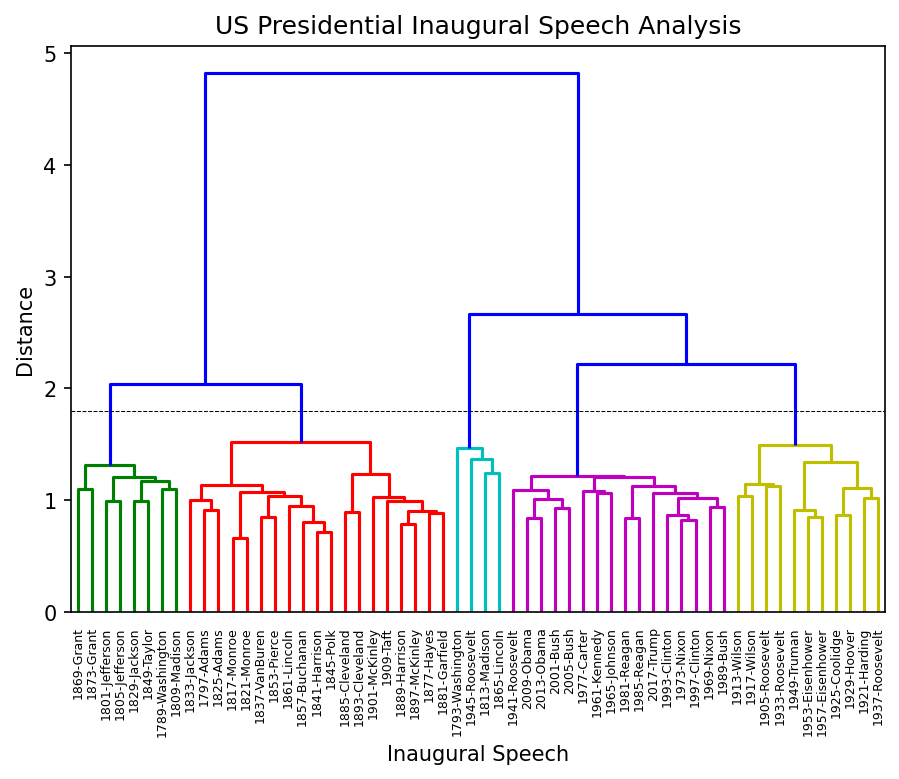

In [ ]:
inaugural_Z = linkage(inaugural_similarity_matrix, 'ward')

plt.figure(figsize=(7, 5))
plt.title('US Presidential Inaugural Speech Analysis')
plt.xlabel('Inaugural Speech')
plt.ylabel('Distance')
color_threshold = 1.8
dendrogram(inaugural_Z, color_threshold = color_threshold, labels=textsid)
plt.axhline(y=color_threshold, c='k', ls='--', lw=0.5)

## Question 2

Please use the Chinese song lyrics from the directory, `demo_data/ChineseSongLyrics`, as the corpus for this exercise. The directory is a collection of song lyrics from nine Chinese pop-song artists.

Please utilize the bag-of-words method to vectorize each artist's song lyrics and provide a cluster analysis of each artist in terms of their textual similarities in lyrics.

A few notes for data processing:
- Please use `ckip-transformers` for word segmentation and POS tagging.
- Please build the bag-of-words model using the `Tfidfvectorizer()`.
- Please include in the model only words (a) whose POS tags start with 'N' or 'V', and (b) which consist of NO digits, alphabets, symbols and punctuations.
- Please make sure you have the word tokens intact when doing the vectorization using `Tfidfvectorizer()`.

The expected result is a dendrogram as shown below. But please note that depending on how you preprocess the data and adjust the parameters of bag-of-words representations, we may have somewhat different results. Please indicate and justify your parameter settings in the bag-of-words model creation (i.e., using markdown cells in notebook).

In [ ]:
lyrics = []
for filename in os.listdir('demo_data/ChineseSongLyrics'):
   with open(os.path.join('demo_data/ChineseSongLyrics', filename), 'r') as f:
     lyrics.append(f.read())

print(len(lyrics))
lyrics[0][:100]

9


'若非狠下心拿什麼想妳\n想成了風雨\u202d\u3000對不起\n保護一顆心看多了烏雲\n兩忘曾經裡\u3000不怨妳\n\u202c\n心中有心語\u202d\u3000\u202c\u202c妳我是雙影\u202d\n\u202c一半無情\u202d\u3000另一半深情\n\u202c貪一點愛什麼痛也允許\u202d\n\u202c用懷疑交換\u202d\u3000\u202c秘密\n寵'

In [ ]:
ws_driver = CkipWordSegmenter(level=3, device=-1)
pos_driver = CkipPosTagger(level=3, device=-1)

def preprocess_doc(doc):
    # extract linguistic contents
    text = ''.join([c for c in doc if unicodedata.category(c)[:2] in ["Lo"] or re.match(r'\n', c)])

    # break into list
    text = [p for p in text.split('\n') if len(p) != 0]

    # word segmentation and pos tagging
    ws = ws_driver(text)
    pos = pos_driver(ws)

    # tokenize document
    w_p_pair = [(w, p) for s_w, s_p in zip(ws, pos) for w, p in zip(s_w, s_p)]
    tokens = [pair[0] for pair in w_p_pair if re.match(r'[NV].*', pair[1])]

    # re-create document from tokens
    new_doc = ' '.join(tokens)
    return new_doc

preprocess_corpus = np.vectorize(preprocess_doc)

In [ ]:
norm_lyrics = preprocess_corpus(lyrics)

Inference: 100%|██████████| 44/44 [21:44<00:00, 29.64s/it]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2192: RuntimeWarning: overflow encountered in ? (vectorized)
  outputs = ufunc(*inputs)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2192: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)


In [ ]:
print(lyrics[0][:100])
print("="*50)
print(norm_lyrics[0][:100])

若非狠下心拿什麼想妳
想成了風雨‭　對不起
保護一顆心看多了烏雲
兩忘曾經裡　不怨妳
‬
心中有心語‭　‬‬妳我是雙影‭
‬一半無情‭　另一半深情
‬貪一點愛什麼痛也允許‭
‬用懷疑交換‭　‬秘密
寵
狠下心 拿 什麼 想 妳 想成 風雨 對不起 保護 一 顆 心 看多 烏雲 兩忘 裡 怨 妳 心 中 有 心語 妳 我 雙影 一半 無情 另 一半 深情 貪 一點 愛 什麼 痛 允許 懷疑 交換 秘密


### Parameter Setting for `TfidfVectorizer()`
- **min_df:** 0.2 (the minimum frequency is set to 20% of the documents)
- **max_df:** 1. (the maximum frequency is set to 100% of the documents, i.e. no restriction)

In [ ]:
tv = TfidfVectorizer(min_df=0.2, max_df=1., 
                     norm='l2',
                     use_idf=True,
                     smooth_idf=True)

lyrics_matrix = tv.fit_transform(norm_lyrics).toarray()

vocab = tv.get_feature_names()
fileids = [re.sub(r'\.txt', '', filename) for filename in os.listdir('demo_data/ChineseSongLyrics')]

lyrics_tfidf_df = pd.DataFrame(np.round(lyrics_matrix, 2), columns=vocab, index=fileids)

lyrics_tfidf_df

,ㄧ起,一下,一下子,一九四三,一些,一些些,一個個,一切,一剎,一剎那,一千,一千零一,一半,一天天,一如,一家人,一幕幕,一廂情願,一張張,一方,一時,一樣,一次次,一步步,一滴滴,一無所有,一無所獲,一片片,一生,一生一世,一百,一瞬間,一統,一般,一萬,一角,一言一行,一輩子,一遍遍,一顆顆,...,麵條,麻木,麻煩,麻痹,麻痺,麻醉,麻雀,黃昏,黃沙,黃色,黃黃,黎明,黑夜,黑暗,黑板,黑洞,黑白,黑膠,黑色,黑雲,默契,默許,默認,點亮,點滴,點燃,點綴,點解,點起,點頭,點點,黯淡,鼓勵,鼓掌,鼓聲,鼓起,鼻子,鼻尖,鼻涕,龍捲風
張惠妹,0.00,0.01,0.00,0.00,0.02,0.00,0.0,0.11,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.0,0.00,0.05,0.00,0.0,0.0,0.02,0.00,0.00,0.03,0.00,0.00,0.03,0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.0,...,0.00,0.01,0.02,0.00,0.0,0.00,0.00,0.01,0.00,0.01,0.00,0.01,0.02,0.02,0.00,0.00,0.00,0.00,0.01,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.0,0.00
周杰倫,0.01,0.02,0.00,0.01,0.01,0.01,0.0,0.07,0.00,0.00,0.01,0.00,0.01,0.00,0.01,0.00,0.01,0.00,0.00,0.0,0.00,0.04,0.01,0.0,0.0,0.00,0.00,0.01,0.04,0.00,0.01,0.00,0.02,0.00,0.00,0.02,0.00,0.00,0.00,0.0,...,0.00,0.00,0.03,0.00,0.0,0.00,0.00,0.01,0.02,0.00,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.03,0.0,0.02,0.0,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.00,0.02,0.01,0.00,0.00,0.01,0.00,0.0,0.03
鄧紫棋,0.00,0.01,0.02,0.00,0.00,0.00,0.0,0.04,0.02,0.00,0.01,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.0,0.00,0.04,0.00,0.0,0.0,0.01,0.00,0.00,0.02,0.00,0.02,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.05,0.02,0.00,0.00,0.00,0.01,0.01,0.0,0.02,0.0,0.00,0.01,0.01,0.01,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.0,0.03
田馥甄,0.00,0.00,0.00,0.00,0.02,0.00,0.0,0.05,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.0,0.00,0.03,0.00,0.0,0.0,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,0.01,0.01,0.0,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.01,0.01,0.00,0.01,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.0,0.00
林俊傑,0.00,0.02,0.00,0.00,0.03,0.00,0.0,0.12,0.00,0.01,0.05,0.00,0.00,0.00,0.01,0.02,0.00,0.01,0.00,0.0,0.00,0.04,0.00,0.0,0.0,0.00,0.01,0.00,0.03,0.00,0.01,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.02,0.00,0.00,0.00,0.04,0.03,0.02,0.00,0.00,0.00,0.00,0.00,0.0,0.02,0.0,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.00,0.00,0.0,0.00
高爾宣,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.06,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.03,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.0,0.00
蔡依林,0.00,0.03,0.00,0.00,0.02,0.00,0.0,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.01,0.05,0.00,0.0,0.0,0.00,0.00,0.00,0.01,0.01,0.02,0.03,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.0,...,0.01,0.00,0.01,0.00,0.0,0.00,0.04,0.01,0.00,0.00,0.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,0.01,0.0,0.02,0.0,0.00,0.01,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.0,0.00
周興哲,0.00,0.00,0.00,0.00,0.01,0.00,0.0,0.07,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.02,0.00,0.00,0.0,0.00,0.06,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.02,0.00,0.00,0.00,0.0,0.01,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
陳奕迅,0.00,0.03,0.00,0.00,0.04,0.00,0.0,0.12,0.02,0.01,0.02,0.00,0.02,0.02,0.00,0.00,0.00,0.00,0.00,0.0,0.01,0.05,0.01,0.0,0.0,0.01,0.00,0.00,0.10,0.01,0.02,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.0,...,0.00,0.01,0.01,0.00,0.0,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.01,0.00,0.00,0.01,0.0,0.01,0.0,0.00,0.00,0.01,0.01,0.00,0.01,0.01,0.00,0.01,0.00,0.01,0.01,0.00,0.01,0.00,0.00,0.0,0.00


In [ ]:
lyrics_similarity_matrix = cosine_similarity(lyrics_matrix)
lyrics_similarity_df = pd.DataFrame(lyrics_similarity_matrix, columns=fileids, index=fileids)

lyrics_similarity_df

,張惠妹,周杰倫,鄧紫棋,田馥甄,林俊傑,高爾宣,蔡依林,周興哲,陳奕迅
張惠妹,1.000000,0.673925,0.594611,0.701449,0.731729,0.393853,0.734802,0.640620,0.725740
周杰倫,0.673925,1.000000,0.570906,0.555691,0.699966,0.408296,0.634709,0.585200,0.656220
鄧紫棋,0.594611,0.570906,1.000000,0.505733,0.626821,0.355551,0.539564,0.533894,0.617720
田馥甄,0.701449,0.555691,0.505733,1.000000,0.609702,0.331491,0.642625,0.532203,0.609501
林俊傑,0.731729,0.699966,0.626821,0.609702,1.000000,0.444281,0.668755,0.690309,0.714269
高爾宣,0.393853,0.408296,0.355551,0.331491,0.444281,1.000000,0.367571,0.340430,0.426760
蔡依林,0.734802,0.634709,0.539564,0.642625,0.668755,0.367571,1.000000,0.575955,0.658263
周興哲,0.640620,0.585200,0.533894,0.532203,0.690309,0.340430,0.575955,1.000000,0.603162
陳奕迅,0.725740,0.656220,0.617720,0.609501,0.714269,0.426760,0.658263,0.603162,1.000000


In [ ]:
# font setting
matplotlib.font_manager.fontManager.addfont('taipei_sans_tc_beta.ttf')
matplotlib.rc('font', family = 'Taipei Sans TC Beta')

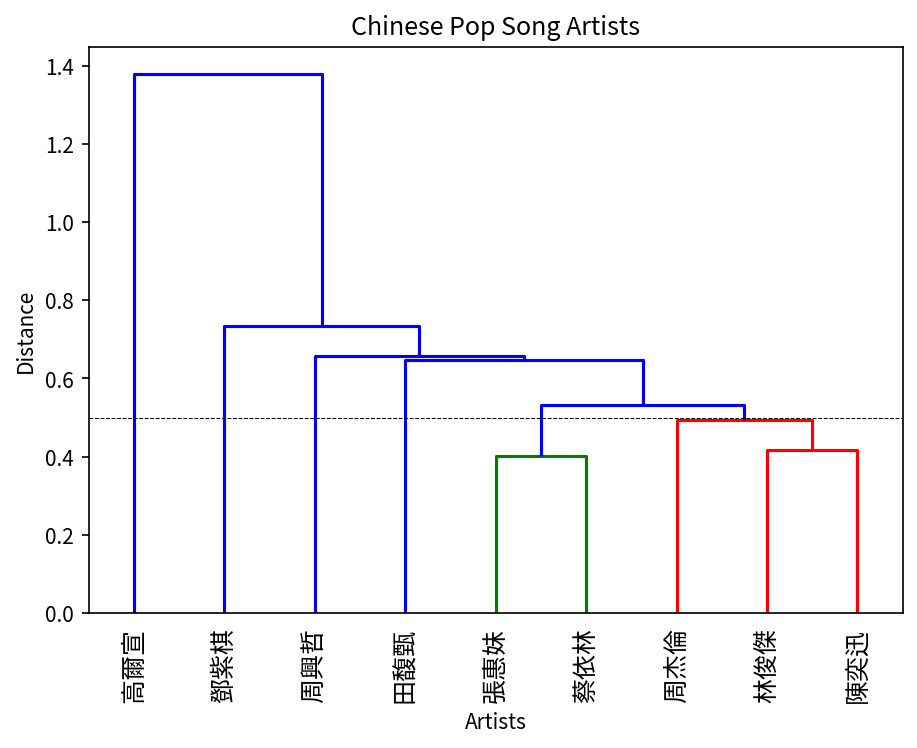

In [ ]:
lyrics_Z = linkage(lyrics_similarity_matrix, 'ward')

plt.figure(figsize=(7, 5))
plt.title('Chinese Pop Song Artists')
plt.xlabel('Artists')
plt.ylabel('Distance')
color_threshold = 0.5
dendrogram(lyrics_Z, labels=fileids, leaf_rotation = 90, color_threshold = color_threshold, above_threshold_color='b')
plt.axhline(y=color_threshold, c='k', ls='--', lw=0.5)